In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
pd.set_option('display.max_columns',75)
sns.set_style('darkgrid')

In [2]:
# Pandas is Reading in the tables from excel

dfc = pd.read_excel('(2)_company_contacts.xlsx')
dfl = pd.read_excel('(1)_company_list_.xlsx')

In [3]:
# take a look at the top of the dfl table
dfl.head()

,company_name,date,teus
0,SonElectronics,2016-04-01,520.333622
1,Waresplus World Wide,2016-04-01,280.515400
2,Sannanix Cross Injections,2016-08-01,953.549324
3,SonElectronics,2016-03-01,405.294087
4,UniTex Polymers,2016-06-01,75.238914


In [4]:
# take a look at the top of the dfc column
dfc.head()

,name,company,title
0,Austin Hayun,Strongline Ltd,Main Person
1,Frank Grove,Waresplus World Wide,VP Operations
2,Blasé Locale,Quotedax Inc.,Logistics
3,Lem Mannors,tempZoom,Logistics
4,Matt York,Keycane Sugar,COO


In [5]:

def segment(total):
    '''
    function for returning the segment category based on total teus
    '''
    if total < 1000:
        return 'emerging'
    if 1000 <= total < 6500:
        return 'smb'
    if 6500 <= total <10000:
        return 'mid_market'
    if total > 10000:
        return 'enterprise'

def assign(search_table, val,col):
    '''
    search table = dataframe with co name index
    
    '''
    if val in search_table.index:
        return search_table.loc[val][col]
    pass
    
    

In [6]:
# create a totals view as a way to calculate and translate segment between tables
dft = dfl.groupby('company_name').teus.sum().sort_values().reset_index()
# call map with segment() to create new column 'segment' in dft
dft['segment'] = dft.teus.map(segment)
# take a loook
dft.head()

,company_name,teus,segment
0,Quotedax Inc.,6.0,emerging
1,Strongline Inc,30.0,emerging
2,Strongline Ltd,50.0,emerging
3,Vialam,78.0,emerging
4,Tempin Imports,100.0,emerging


In [7]:
# translate segment value to dfl table using dft and a call to assign.  think join
dfl['segment'] = dfl.company_name.map(lambda x: assign(dft.set_index('company_name'),x,'segment'))

In [8]:
'''
above line explained:
# take dfl table
>>>   dfl. 
#take column company name in dfl
>>>   company_name.
#map values in company name column to lambda function
>>>   map(lambda x:
# call the assign function for value x
>>>   assign(
# pass a dft indexed by company name as search table    
>>>   dft.set_index('company_name')
# pass the x value from lambda mapped from dfl
>>>   ,x,
# pass segment as the name of the column containing the value we ar interested in 
>>>   'segment'))
# returns segment 
'''



"\nabove line explained:\n# take dfl table\n>>>   dfl. \n#take column company name in dfl\n>>>   company_name.\n#map values in company name column to lambda function\n>>>   map(lambda x:\n# call the assign function for value x\n>>>   assign(\n# pass a dft indexed by company name as search table    \n>>>   dft.set_index('company_name')\n# pass the x value from lambda mapped from dfl\n>>>   ,x,\n# pass segment as the name of the column containing the value we ar interested in \n>>>   'segment'))\n# returns segment \n"

In [9]:
# create a month column on dfl, used map with the datetime object 
# in dfl date column and asked for the month portion of that datetime object
dfl['month'] = dfl.date.map(lambda x: x.month)

## Dataset Issues... fixed:

#### One unknown company name

In [10]:
dfl[dfl.company_name.isnull()]

,company_name,date,teus,segment,month
45,NaN,2016-06-01,995.964648,None,6.0


def appears to be an smb sector carier, lets take a look at those in june

In [11]:
mean = dfl.query("month==6 & segment=='smb'").teus.mean()
med = dfl.query("month==6 & segment=='smb'").teus.median()
obs = dfl.query("month==6 & segment=='smb'").teus.count()
mini = dfl.query("month==6 & segment=='smb'").teus.min()
maxi = dfl.query("month==6 & segment=='smb'").teus.max()
print("month 6: \n\t mean: {} \n\t median: {}\n\t min: {}\n\t max: {}\n\t accross {} obs.".format(mean,med,mini,maxi,obs))

month 6: 
	 mean: 487.15006417071356 
	 median: 502.0581972083369
	 min: 40.732086586339086
	 max: 967.0210690841423
	 accross 18 obs.


that would be the highest... what companies on our contacts do we not have observations for?

In [12]:
contacts = set(dfc.company)
obs = set(dfl.company_name)
{x for x in contacts if x not in obs}


{'Randax Wear', 'Roundlex'}

maybe we have more contacts for one,  that could explain the existence of the data 

In [13]:
dfc[dfc.company == 'Randax Wear'].name.count(), dfc[dfc.company == 'Roundlex'].name.count()

(1, 1)

 yee looks as though we don't have enough to attribute this data point  
 as it's already something of an outlier, it seems the most reasonable move to drop it  
we'll take care of that later after we've worked on  any other missing values

#### Four observations with no dates,  need to fill those in

In [14]:
dfl[dfl.date.isnull()]

,company_name,date,teus,segment,month
5,TouchCone Systems,NaT,506.895500,smb,NaN
29,TouchCone Systems,NaT,638.608723,smb,NaN
71,Quotedax Inc.,NaT,6.000000,emerging,NaN
139,TouchCone Systems,NaT,169.366887,smb,NaN


In [15]:
# so we are missing months 3,4,5
dfl[dfl.company_name == 'TouchCone Systems']

,company_name,date,teus,segment,month
5,TouchCone Systems,NaT,506.895500,smb,NaN
29,TouchCone Systems,NaT,638.608723,smb,NaN
57,TouchCone Systems,2016-08-01,485.226351,smb,8.0
96,TouchCone Systems,2016-02-01,39.188439,smb,2.0
136,TouchCone Systems,2016-01-01,418.328477,smb,1.0
139,TouchCone Systems,NaT,169.366887,smb,NaN
186,TouchCone Systems,2016-06-01,40.732087,smb,6.0
196,TouchCone Systems,2016-07-01,884.364022,smb,7.0


 first lets look at the segment mean/median

In [16]:
for s in ['smb', 'emerging']:
    print('  sector: {}'.format(s))
    for n in [3,4,5]:
        mean = dfl.query("month=={} & segment=='{}'".format(n,s)).teus.mean()
        med = dfl.query("month=={} & segment=='{}'".format(n,s)).teus.median()
        print("month {}: \n\t mean: {} \n\t median: {}\n".format(n,mean,med))

  sector: smb
month 3: 
	 mean: 384.5813237274911 
	 median: 405.294087451871

month 4: 
	 mean: 525.8236786822404 
	 median: 550.2889874958003

month 5: 
	 mean: 451.01694583014415 
	 median: 478.9291006175418

  sector: emerging
month 3: 
	 mean: 53.4 
	 median: 2.0

month 4: 
	 mean: 25.2 
	 median: 10.0

month 5: 
	 mean: 13.833333333333334 
	 median: 10.0



 looks like the ranks from low to high are 3,5,4  
 now lets see what we have for touch cone

In [17]:
dfl[(dfl.company_name == 'TouchCone Systems')&(dfl.date.isnull())]

,company_name,date,teus,segment,month
5,TouchCone Systems,NaT,506.895500,smb,NaN
29,TouchCone Systems,NaT,638.608723,smb,NaN
139,TouchCone Systems,NaT,169.366887,smb,NaN


seems reasonable to follow in step with the ranks for the smb sector  
 so loc139 will be march, loc29 april, loc5 may

In [18]:
dfl.loc[139,'date']= pd.Timestamp('2016-03-01')
dfl.loc[29,'date']= pd.Timestamp('2016-04-01')
dfl.loc[5,'date'] = pd.Timestamp('2016-05-01')

In [19]:
# touchcone is now complete
dfl[(dfl.company_name == 'TouchCone Systems')]

,company_name,date,teus,segment,month
5,TouchCone Systems,2016-05-01,506.895500,smb,NaN
29,TouchCone Systems,2016-04-01,638.608723,smb,NaN
57,TouchCone Systems,2016-08-01,485.226351,smb,8.0
96,TouchCone Systems,2016-02-01,39.188439,smb,2.0
136,TouchCone Systems,2016-01-01,418.328477,smb,1.0
139,TouchCone Systems,2016-03-01,169.366887,smb,NaN
186,TouchCone Systems,2016-06-01,40.732087,smb,6.0
196,TouchCone Systems,2016-07-01,884.364022,smb,7.0


In [20]:
# quotedax is still a problem
dfl[dfl.date.isnull()]

,company_name,date,teus,segment,month
71,Quotedax Inc.,NaT,6.0,emerging,NaN


In [21]:
# only one observation can we imput the date?
dfl[dfl.company_name =='Quotedax Inc.']

,company_name,date,teus,segment,month
71,Quotedax Inc.,NaT,6.0,emerging,NaN


First we'll check some stats

In [22]:
# stats for the emerging markets accross all months
for n in range(1,9):
    mean = dfl.query("month=={} & segment=='emerging'".format(n)).teus.mean()
    med = dfl.query("month=={} & segment=='emerging'".format(n)).teus.median()
    obs = dfl.query("month=={} & segment=='emerging'".format(n)).teus.count()
    print("month {}: \n\t mean: {} \n\t median: {}\n\t accross {} obs.".format(n,mean,med,obs))
# looks like jan/feb might be our most reasonable

month 1: 
	 mean: 12.0 
	 median: 10.0
	 accross 5 obs.
month 2: 
	 mean: 28.5 
	 median: 7.0
	 accross 4 obs.
month 3: 
	 mean: 53.4 
	 median: 2.0
	 accross 5 obs.
month 4: 
	 mean: 25.2 
	 median: 10.0
	 accross 5 obs.
month 5: 
	 mean: 13.833333333333334 
	 median: 10.0
	 accross 6 obs.
month 6: 
	 mean: 20.666666666666668 
	 median: 20.0
	 accross 6 obs.
month 7: 
	 mean: 28.0 
	 median: 15.0
	 accross 6 obs.
month 8: 
	 mean: 38.333333333333336 
	 median: 20.0
	 accross 6 obs.


let's drill down a little deeper

In [23]:
dfl.query("month==1 & segment=='emerging'").teus,dfl.query("month==2 & segment=='emerging'").teus

(93      0.0
 97     10.0
 112    35.0
 150    10.0
 175     5.0
 Name: teus, dtype: float64, 34     10.0
 40    100.0
 53      NaN
 55      4.0
 63      0.0
 Name: teus, dtype: float64)

January seems the most reasonable fit so we'll replace it

In [24]:
dfl.loc[71,'date'] = pd.Timestamp('2016-01-01')

double check to see we are all filled

In [25]:
all(dfl.date.map(lambda x: pd.isnull(x))) == False

True

 With all those replaced we'll re-run our month column 

In [26]:
dfl['month'] = dfl.date.map(lambda x: x.month)

#### Finally we have some missing teus values,  lets work on those

In [27]:
dfl[dfl.teus.isnull()]

,company_name,date,teus,segment,month
16,Volt Holding Company,2016-07-01,NaN,None,7
39,Volt Holding Company,2016-01-01,NaN,None,1
50,Volt Holding Company,2016-04-01,NaN,None,4
53,Vialam,2016-02-01,NaN,emerging,2
66,Volt Holding Company,2016-03-01,NaN,None,3
73,Volt Holding Company,2016-02-01,NaN,None,2
126,Volt Holding Company,2016-06-01,NaN,None,6
174,Volt Holding Company,2016-05-01,NaN,None,5
181,Bigfan Networks,2016-05-01,NaN,smb,5
190,Volt Holding Company,2016-08-01,NaN,None,8


 volt is doing nothing for us, that's probably out,  let's look at the others and try to impute

In [28]:
colist = ['Vialam', 'Bigfan Networks',
       'Generic Trading Company']

In [29]:
# vialam observations
dfl[dfl.company_name == colist[0]]

,company_name,date,teus,segment,month
6,Vialam,2016-03-01,0.0,emerging,3
31,Vialam,2016-08-01,30.0,emerging,8
47,Vialam,2016-05-01,3.0,emerging,5
53,Vialam,2016-02-01,NaN,emerging,2
77,Vialam,2016-07-01,20.0,emerging,7
104,Vialam,2016-04-01,0.0,emerging,4
150,Vialam,2016-01-01,10.0,emerging,1
184,Vialam,2016-06-01,15.0,emerging,6


In [30]:
# Bigfan Networks observations
dfl[dfl.company_name == colist[1]]

,company_name,date,teus,segment,month
25,Bigfan Networks,2016-03-01,287.986670,smb,3
26,Bigfan Networks,2016-02-01,933.104624,smb,2
111,Bigfan Networks,2016-07-01,86.613424,smb,7
116,Bigfan Networks,2016-01-01,467.928134,smb,1
117,Bigfan Networks,2016-04-01,747.129698,smb,4
127,Bigfan Networks,2016-08-01,475.666162,smb,8
162,Bigfan Networks,2016-06-01,243.944781,smb,6
181,Bigfan Networks,2016-05-01,NaN,smb,5


In [31]:
# Generic Trading Company observations
dfl[dfl.company_name == colist[2]]

,company_name,date,teus,segment,month
19,Generic Trading Company,2016-06-01,504.101360,smb,6
27,Generic Trading Company,2016-02-01,113.513941,smb,2
81,Generic Trading Company,2016-08-01,790.948970,smb,8
92,Generic Trading Company,2016-07-01,887.900924,smb,7
169,Generic Trading Company,2016-05-01,583.741232,smb,5
170,Generic Trading Company,2016-01-01,682.839884,smb,1
179,Generic Trading Company,2016-04-01,844.295927,smb,4
200,Generic Trading Company,2016-03-01,NaN,smb,3


Allright we have two smb's and one emerging missing one value out of 8 possible each, this we can manage, we'll start with our emerging

The plan is to determin what quartile the company generally falls in across all observations, and then insert a value that is in line with the quartile for the missing month  to do that we'll define two functions,  the first will figure out the company's mean percentile accross all months, the second will call the first and use that percentile to return an imputed value based onthe teus values for the month the missing value falls in

In [32]:
from scipy.stats import percentileofscore as pos
def per_n(co_name, segment):
    '''
    this will take a company name and it's segment, and it will calculate the 
    mean percentile the companies teus value falls in across all observed months
    '''
    scores = []
    for n in range(1,9):
        q = dfl.query("month=={} & segment=='{}'".format(n,segment)).set_index('company_name')
        co = q.loc['{}'.format(co_name)].teus
        if not pd.isnull(co):
            score = pos(a=q.teus, score=co)
            scores.append(score)        
    return np.mean(scores)


def impute_teus(co_name, segment):
    '''
    this will take a company's name and segment, it will call the function above to 
    calculate company's mean percentile across observations, It will then search for a missing
    teus value.  It then determins the quartile range for the month that missing value falls in 
    and it takes the company's mean percentile and imputes a value based on the months quartile
    range
    '''
    quant = per_n(co_name, segment)
    for n in range(1,9):        
        q = dfl.query("month=={} & segment=='{}'".format(n,segment)).set_index('company_name')
        co = q.loc['{}'.format(co_name)].teus
        if pd.isnull(co):
            imputed = q.teus.quantile(q=quant/100)
            return imputed

Now that we have that, it's a breeze to fill in our missing values

In [33]:
# first Vialam
dfl.loc[53,'teus'] = impute_teus('Vialam','emerging')

In [34]:
# bigfan
dfl.loc[181,'teus'] = impute_teus('Bigfan Networks','smb')

In [35]:
# finally Generic Trading Company
dfl.loc[200,'teus'] = impute_teus('Generic Trading Company','smb')

In [36]:
# let's see how we did
dfl.loc[[53,181,200]]

,company_name,date,teus,segment,month
53,Vialam,2016-02-01,6.571429,emerging,2
181,Bigfan Networks,2016-05-01,485.167220,smb,5
200,Generic Trading Company,2016-03-01,581.253414,smb,3


In [37]:
# now we look to see what teus values are null once again to make sure we didn't miss anything
dfl[dfl.teus.isnull()]

,company_name,date,teus,segment,month
16,Volt Holding Company,2016-07-01,NaN,None,7
39,Volt Holding Company,2016-01-01,NaN,None,1
50,Volt Holding Company,2016-04-01,NaN,None,4
66,Volt Holding Company,2016-03-01,NaN,None,3
73,Volt Holding Company,2016-02-01,NaN,None,2
126,Volt Holding Company,2016-06-01,NaN,None,6
174,Volt Holding Company,2016-05-01,NaN,None,5
190,Volt Holding Company,2016-08-01,NaN,None,8


We've done it, every other missing value we have is one we can't reasonably imput or calculate.  We'll check the shape first and the drop our null values

In [38]:
# we look to see how many observations we have before dropping nulls
dfl.shape

(205, 5)

In [39]:
# now we drop any null values
dfl = dfl.dropna()

In [40]:
# now we look to see haow many observations we have after the null drop
dfl.shape
# this shows us we got rid of 9 observations we didn't have enough info to mess with

(196, 5)

not too shaby, we've got a nice clean frame to work with now

In [41]:
# to keep our tables in sync we'll also drop the outlier from our totals column
dft = dft.dropna()

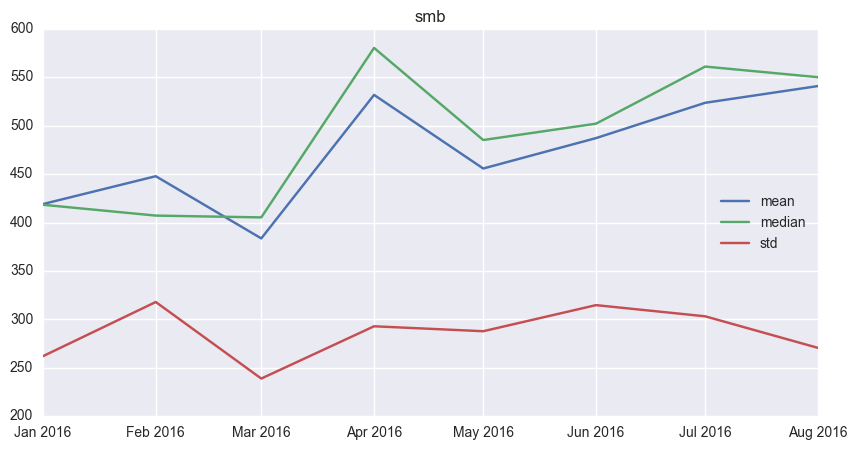

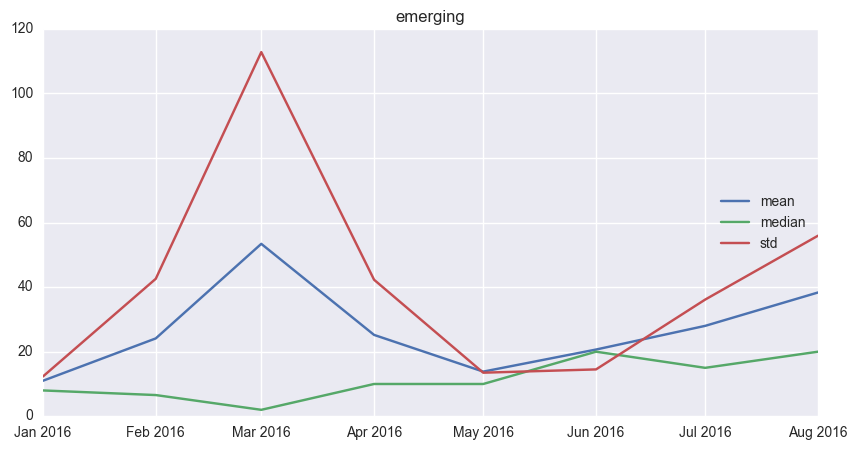

In [42]:
# now we'll do a plot of the stats for each sector
# first we set up a working frame sorted by company name and then date
frame = dfl.sort_values(['company_name', 'date'])
# now we'll loop through the uniqu segments(smb and emerging) 
# with each loop we'll build a plot
for seg in frame.segment.unique():
#     sets plot size
    fig, ax = plt.subplots(1, figsize = (10,5),)
#     sets plot title
    ax.set_title(seg)
#     plots a line for the mean
    ax.plot(frame.groupby(['segment','date']).teus.mean().loc[seg])
#     plots a line for the median
    ax.plot(frame.groupby(['segment','date']).teus.median().loc[seg])
#     plots a line for the standard deviation
    ax.plot(frame.groupby(['segment','date']).teus.std().loc[seg])
#     adds a legend too the plot
    ax.legend(['mean','median','std','mode'],loc=7)


That's a decent overview of segments, let's look a little more closeley at some of our companies first we'll pivot to make it a little easier

In [43]:
# now we'll create a pivot table,  we'll separate on the index it first by segment
#  and then bycompany name.  we want our columns to be months, and we want the values to 
# be the teus value
pf = pd.pivot_table(dfl,index=['segment','company_name'],columns='month',values='teus')
# that operation gives us a bunch of  null values where observations simply didn't exist 
# matplotlib gets frustrated with null values so fe'll fill them with zeros
pf = pf.fillna(0)
# and we can take a look
pf

month                                                 1           2  \
segment  company_name                                                 
emerging Fasetom Technologies                  0.000000    0.000000   
         Keycane Sugar                        35.000000  100.000000   
         Quotedax Inc.                         6.000000    0.000000   
         Roundlex Rubber Seals                 5.000000    4.000000   
         Strongline Inc                       10.000000   10.000000   
         Strongline Ltd                        0.000000    0.000000   
         Tempin Imports                        0.000000    0.000000   
         Vialam                               10.000000    6.571429   
smb      Air and Ocean Forwarding Asset      100.000000  250.000000   
         Bigfan Networks                     467.928134  933.104624   
         FoodMain Plus                        83.945962  105.969585   
         Generic Trading Company             682.839884  113.513941   
         Llyod Braun Enterprises             849.883741  276.148154   
         Quoteline Data Processing Machines  273.860308  733.168908   
         Sannanix Cross Injections           624.865435  157.873420   
         Silt Filter 2000                     37.504785  936.669614   
         Solplanet LLC                       761.499672  458.859806   
         SonElectronics                       71.062642  996.127302   
         SumoTech                            759.572514  200.030919   
         SunShade LLC                        236.444682  407.160226   
         ThermoTemp Printing                 384.228158  669.750606   
         TouchCone Systems                   418.328477   39.188439   
         Tresdonice Inc.                     157.501763  351.059391   
         TruthStreet Security Systems        559.371901  895.089118   
         UniTex Polymers                     309.678196  424.228734   
         Waresplus World Wide                534.892514  145.436918   
         tempZoom                            648.884191  415.029976   

month                                                 3           4  \
segment  company_name                                                 
emerging Fasetom Technologies                  0.000000   15.000000   
         Keycane Sugar                       255.000000  100.000000   
         Quotedax Inc.                         0.000000    0.000000   
         Roundlex Rubber Seals                 2.000000    1.000000   
         Strongline Inc                       10.000000    0.000000   
         Strongline Ltd                        0.000000   10.000000   
         Tempin Imports                        0.000000    0.000000   
         Vialam                                0.000000    0.000000   
smb      Air and Ocean Forwarding Asset      132.000000  109.000000   
         Bigfan Networks                     287.986670  747.129698   
         FoodMain Plus                       536.321426  989.007063   
         Generic Trading Company             581.253414  844.295927   
         Llyod Braun Enterprises             295.844287  823.021133   
         Quoteline Data Processing Machines  617.130778   18.427808   
         Sannanix Cross Injections            36.580052  357.042537   
         Silt Filter 2000                    618.008489  488.421393   
         Solplanet LLC                       163.056313  126.681240   
         SonElectronics                      405.294087  520.333622   
         SumoTech                            421.816088  580.244353   
         SunShade LLC                        759.608352  845.124174   
         ThermoTemp Printing                 657.906872  338.217431   
         TouchCone Systems                   169.366887  638.608723   
         Tresdonice Inc.                     633.436347  663.140290   
         TruthStreet Security Systems        107.430352  607.359215   
         UniTex Polymers                     614.495248  224.423320   
         Waresplus Worl

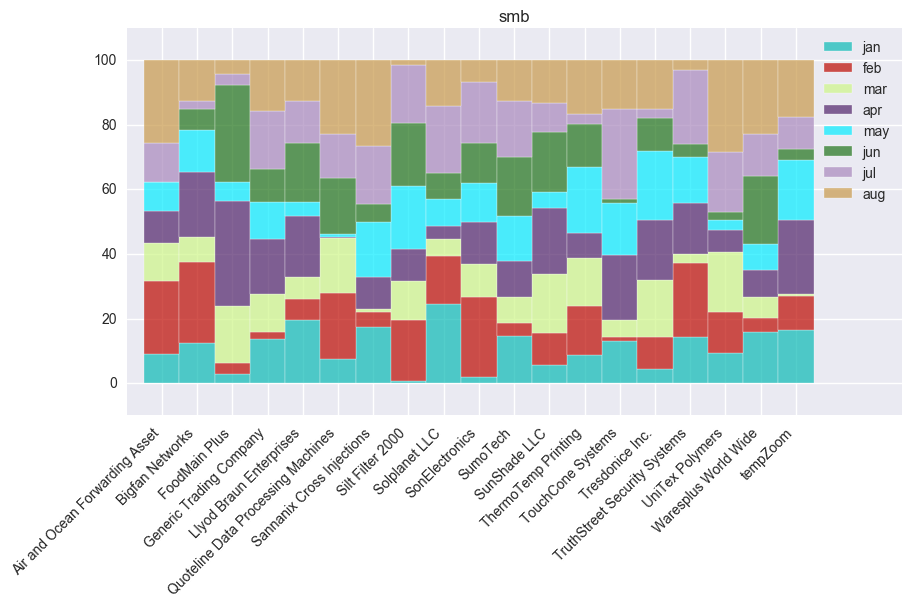

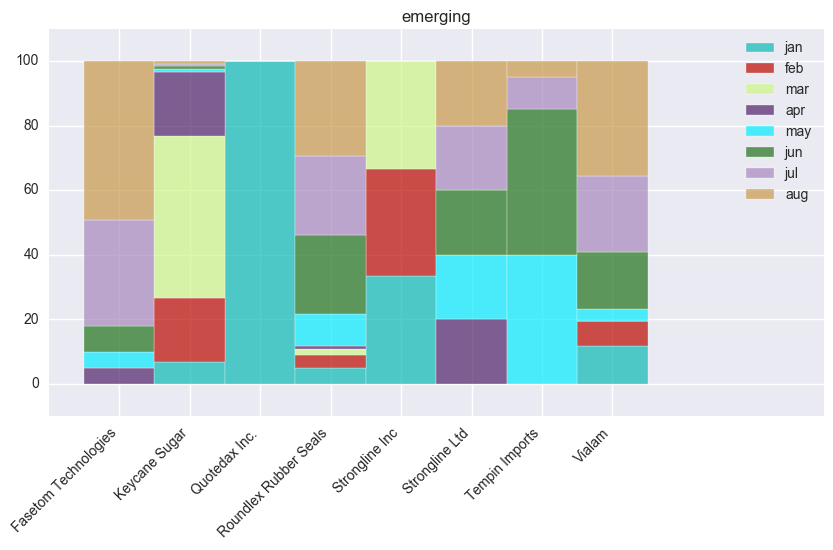

In [44]:
# as above we loop through segments, createing a new plot for each segment
for seg in dfl.segment.unique():
#     we set up a working frame that is a view of our pivot table with just the segment we're interested in
    wf = pf.loc[seg]
#     we initialize the plot
    fig, ax = plt.subplots(1, figsize=(10,5))
#     we title the plot as the segment name
    ax.set_title(seg)
#     we tell it how wide each bar should be
    bar_width = 1
#     we make a list of 0,1,2... one digit for each company observed
    bar_l = [i for i in range(len(wf[1]))]
#     we make a list of positional indicators for the labels on our plot 
    tick_pos = [i+(bar_width/2) for i in bar_l]
#     we sum up the totals for each column
    totals = [sum(i) for i  in zip(wf[1],wf[2],wf[3],wf[4],wf[5],wf[6],wf[7],wf[8])]
#     we make a plist of the percentage each company represents for each month 
# based on the totals we summed above
    jan = [i / j * 100 for  i,j in zip(wf[1], totals)]
    feb = [i / j * 100 for  i,j in zip(wf[2], totals)]
    mar = [i / j * 100 for  i,j in zip(wf[3], totals)]
    apr = [i / j * 100 for  i,j in zip(wf[4], totals)]
    may = [i / j * 100 for  i,j in zip(wf[5], totals)]
    jun = [i / j * 100 for  i,j in zip(wf[6], totals)]
    jul = [i / j * 100 for  i,j in zip(wf[7], totals)]
    aug = [i / j * 100 for  i,j in zip(wf[8], totals)]
#     we build the bars for each observed month and we 
#     stack them on top of each other using the bottom param
    ax.bar(bar_l, jan, label= 'jan',width=bar_width,
           color='#0abab5',edgecolor='white', alpha=.7)
    ax.bar(bar_l, feb, label= 'feb',
           bottom=jan,width=bar_width, 
           color='#bd0900',edgecolor='white', alpha=.7)
    ax.bar(bar_l, mar, label= 'mar',
           bottom=[i+j for i,j in zip(jan, feb)],
           width=bar_width, color='#cef688',edgecolor='white', alpha=.7)
    ax.bar(bar_l, apr, label= 'apr',
           bottom=[i+j+k for i,j,k in zip(jan,feb,mar )],
           width=bar_width, color='#502369',edgecolor='white', alpha=.7)
    ax.bar(bar_l, may, label= 'may',
           bottom=[i+j+k+l for i,j,k,l in zip(jan,feb,mar,apr )],
           width=bar_width, color='#05ecff',edgecolor='white', alpha=.7)
    ax.bar(bar_l, jun, label= 'jun',
           bottom=[i+j+k+l+m for i,j,k,l,m in zip(jan,feb,mar,apr,may )],
           width=bar_width, color='#207319',edgecolor='white', alpha=.7)
    ax.bar(bar_l, jul, label= 'jul',
           bottom=[i+j+k+l+m+n for i,j,k,l,m,n in zip(jan,feb,mar,apr,may,jun )],
           width=bar_width, color='#a988bc',edgecolor='white', alpha=.7)
#     I'll break down all the params here:
# ax.bar means give me a new bar, we pass bar_l so that it gives us one  bar for each company
    ax.bar(bar_l, 
#            this data is for august so we tell it to use the aug list to build the bars height
           aug, 
#            we give it a label of aug
           label= 'aug',
#            we tell it to make the bars 'bar_width' wide as defined above
           width=bar_width, 
#            we tell it what color these bars should be
           color='#c8994b',
#            we set the position of our bars as the sum of the height of all the bars that came before it
           bottom=[i1+i2+i3+i4+i5+i6+i7 for i1,i2,i3,i4,i5,i6,i7 in zip(jan,feb,mar,apr,may,jun,jul)],
#            we give the bars a white border
           edgecolor='white', 
#            we make the bars have a 70% opacity
           alpha=.7)
#     we create a legend for the plot
    ax.legend(['jan','feb','mar','apr','may','jun','jul','aug'])
#     we add the company names along the x axis
    plt.xticks(tick_pos, wf.index)
#     we set a limit for the width of the x axis based on our data
    plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width+2])
#     we set a limit for the y axis
    plt.ylim(-10, 110)
#     we make those labels legible by rotating them 45 degrees
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
    
# gonna make this arbitrary 

The next bit i'm going to try to make a stacked bar chart to get a feel for how much volume each company does on a monthely basis, this is still in progress

In [45]:
# thit is a new pivot table view of the data, 
# this time we put the months as rows and the segment/company as columns 
pc = pd.pivot_table(dfl,index=['month'],columns=['segment','company_name'],values='teus')
pc = pc.fillna(0)

In [46]:
import matplotlib.cm as cmx
import matplotlib.colors as colors
def get_cmap(N, mapname='hsv'):
    '''Returns a function that maps each index in 0, 1, ... N-1 to a distinct 
    RGB color.'''
    color_norm  = colors.Normalize(vmin=0, vmax=N-1)
    scalar_map = cmx.ScalarMappable(norm=color_norm, cmap=mapname) 
    def map_index_to_rgb_color(index):
        return scalar_map.to_rgba(index)
    return map_index_to_rgb_color

cmap = get_cmap(len(pc.iloc[1]),'viridis')

In [47]:
def stacked_bar(level1,pivot,colormap='gist_ncar'):
    '''
    for doing stacked bar plots on a multilevel pivot table
    '''
    for seg in level1:
        frame = pivot[seg]
        fig, ax = plt.subplots(1, figsize=(10,5))
        ax.set_title(seg)
        bar_l = [i for i in range(len(frame.iloc[:,0]))]
        bar_width = 1
        tick_pos = [i+(bar_width/2) for i in bar_l]
        heights = []
        cmap = get_cmap(len(frame.iloc[0]),colormap)
        for i, c in enumerate(frame.columns):
            cols = list(frame.iloc[:,:i].columns)
            if len(cols) == 0:
                heights.append(np.zeros(len(frame.iloc[:,0])))
            if len(cols) == 1:
                heights.append(list(frame[cols[0]]))
            if len(cols) > 1:
                heights.append([np.sum(i) for i in zip(*[frame[col] for col in cols])])
        for i,c in enumerate(frame.columns):
            ax.bar(bar_l, frame[c], width=bar_width,
                   bottom= heights[i], label=c ,color=cmap(i), edgecolor='black')
        leg_n = [''.join(x[:15]) for x in [list(i) for i in frame.columns]]
        lgnd = ax.legend(leg_n,loc=7,fontsize=8,fancybox=1)
        lgnd.set_bbox_to_anchor((1.18,.5))
        
        plt.xticks(tick_pos, frame.index)
        plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])


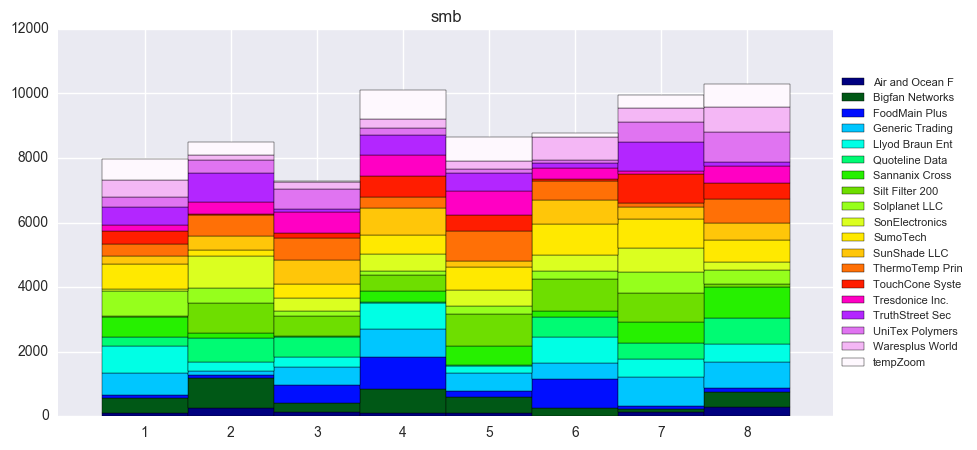

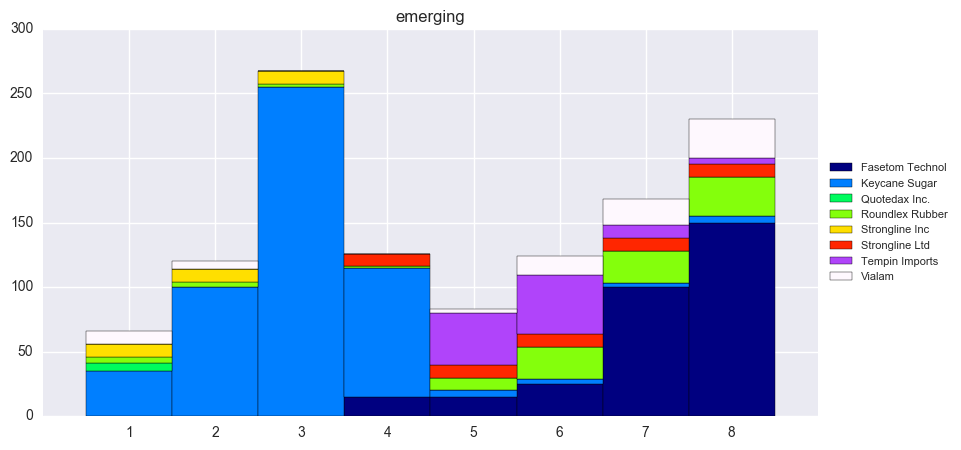

In [48]:
stacked_bar(level1=dfl.segment.unique(), pivot=pc)